# Interpolation Using Lagrange Polynomials in 1d

Generation of Lagrange polynomials for approximation on a 1d grid.

## Generating interpolation functions on the interval [-1, 1]

In [46]:
from sigmaepsilon.math.function import Function
from sigmaepsilon.math.approx import gen_Lagrange_1d

indices = [1, 2, 3, 4]
functions = gen_Lagrange_1d(i=indices)

functions[indices[0]][0]  # first interpolation function
functions[indices[0]][1]  # first derivative of first interpolation function
functions[indices[0]][2]  # second derivative of first interpolation function

functions[indices[1]][0]  # second interpolation function
functions[indices[1]][1]  # first derivative of second interpolation function
functions[indices[1]][2]  # second derivative of second interpolation function

10.125*x - 1.125

### Plotting the basis functions

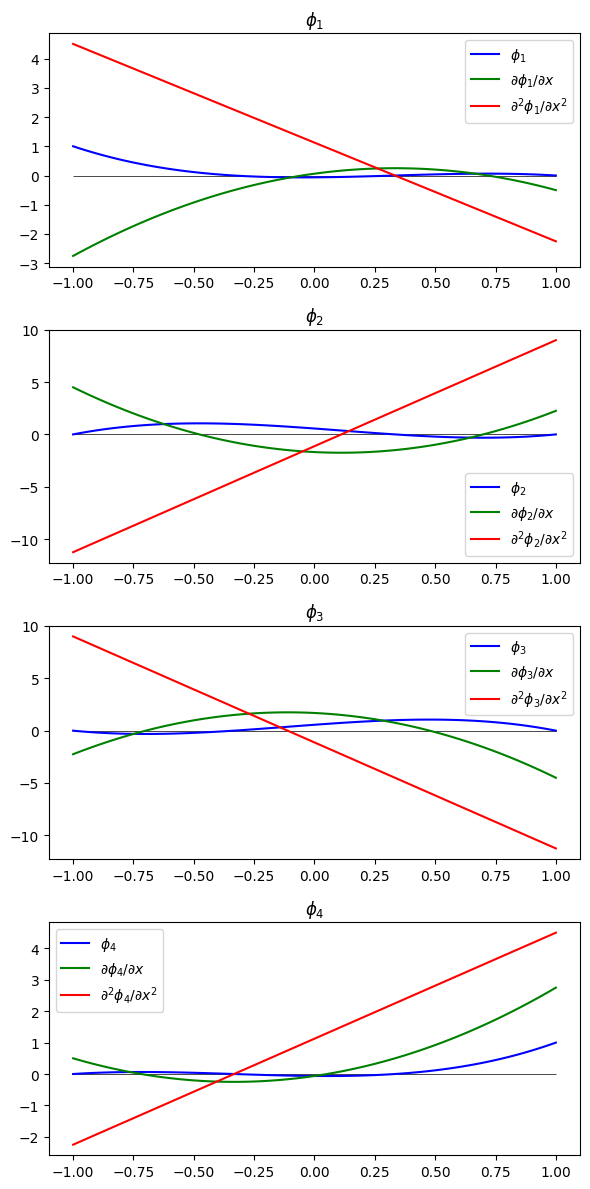

In [47]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

fig = plt.figure(figsize=(6, 12))  # in inches
fig.patch.set_facecolor("white")
gs = gridspec.GridSpec(len(indices), 1)

xdata = np.linspace(-1, 1, 100)

for i, ind in enumerate(indices):
    ax = fig.add_subplot(gs[i])
    label = "$" + functions[ind]["symbol"] + "$"
    label_dx = "$\\partial" + functions[ind]["symbol"] + "/\\partial x$"
    label_dxx = "$\\partial^2" + functions[ind]["symbol"] + "/\\partial x^2$"
    ax.set_title(label)
    fnc = Function(functions[ind][0])
    fnc_dx = Function(functions[ind][1])
    fnc_dxx = Function(functions[ind][2])
    fdata = fnc([xdata])
    fdata_dx = fnc_dx([xdata])
    fdata_dxx = fnc_dxx([xdata])
    ax.plot(xdata, fdata, color="b", label=label)
    ax.plot(xdata, fdata_dx, color="g", label=label_dx)
    ax.plot(xdata, fdata_dxx, color="r", label=label_dxx)
    ax.hlines(y=0, xmin=-1, xmax=1, colors="k", zorder=-10, lw=0.5)
    ax.legend()

fig.tight_layout()

## Interpolating on known data

In [48]:
x_data = np.array([1.0, 1.25, 1.5, 1.75, 2.0])
y_data = (np.random.rand(len(x_data)) - 0.5) * 10
indices = list(range(len(x_data)))
functions = gen_Lagrange_1d(x=x_data, i=indices)
f_data = [Function(functions[i][0]) for i in range(len(functions))]


def f_interp(x: float) -> float:
    return sum([f_data[i]([x]) * y_data[i] for i in range(len(functions))])

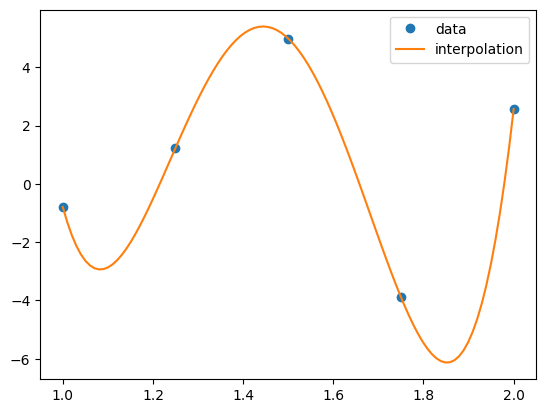

In [49]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, "o", label="data")
x_sample = np.linspace(x_data.min(), x_data.max(), 100)
y_sample = [f_interp(x) for x in x_sample]
ax.plot(x_sample, y_sample, "-", label="interpolation")
ax.legend()

In [50]:
from sigmaepsilon.math.approx import approx_Lagrange_1d

approx = approx_Lagrange_1d(x_data, y_data, lambdify=True)
y_sample = [approx(x) for x in x_sample]

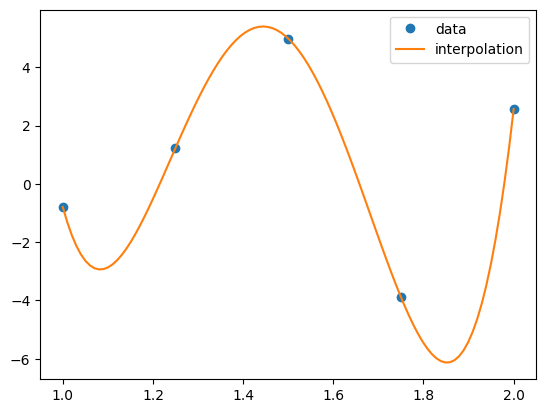

In [51]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, "o", label="data")
ax.plot(x_sample, y_sample, "-", label="interpolation")
ax.legend()